Hola **Oscar**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
    <b>Respuesta:</b> 


<div style="background-color: #ede7f6; padding: 13px; border-radius: 12px; ">
    
# 🏋️‍♂️📉 ANÁLISIS DE RETENCIÓN DE CLIENTES PARA MODEL FITNESS
## CONTEXTO INTRODUCTORIO

El presente proyecto tiene como propósito analizar los datos de **Model Fitness**, una cadena de gimnasios que busca fortalecer su estrategia de **retención de clientes** mediante el uso de **aprendizaje automático y análisis de datos.**

El conjunto de datos contiene información sobre los clientes, sus características demográficas, comportamiento de asistencia al gimnasio, duración de sus contratos y gastos en servicios adicionales, junto con una variable objetivo (Churn) que indica si un cliente **ha cancelado su membresía o continúa activo.**

El objetivo principal es identificar patrones asociados al **abandono (churn)** y desarrollar un modelo predictivo que permita **anticipar qué usuarios tienen mayor probabilidad de dejar el gimnasio**, comprendiendo los factores que más influyen en esa decisión.

**🧠 OBJETIVO FINAL**

Dotar a Model Fitness de un **modelo analítico y predictivo** que permita **anticipar la fuga de clientes**, entender las **causas del abandono y fortalecer la lealtad** de los usuarios mediante recomendaciones basadas en datos.

A través de técnicas de **clasificación supervisada y clustering no supervisado,** se buscará no solo predecir quién podría darse de baja, sino también **por qué y cómo evitarlo**, estableciendo una estrategia de retención sustentada en información cuantitativa y comportamientos observables.

</div>


<div style="background-color: #E6E6FA; padding: 10px; border-radius: 12px; ">

## **PASO 1. IMPORTAR LIBRERIAS Y DESCARGA DE DATOS**

</div>

In [1]:
# Librerias Principales
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesamiento y División
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelos Supervisados
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, silhouette_score

# Modelos No Supervisados (Clustering)
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')

<div style="background-color: #d3d3d3; padding: 10px; font-size: 12px; font-weight: bold;">
    
#### CONFIGURACION DE FORMATO: LIMITAR FLOATS A 2 DECIMALES Y SEPARAR MILES

</div>

In [3]:
# Establecer el formato de visualización para floats (2 decimales y separación de miles)
pd.options.display.float_format = '{:,.2f}'.format

<div style="background-color: #E6E6FA; padding: 15px; border-radius: 12px; ">
    
## **PASO 2. ANALISIS EXPLORATORIO DE DATOS (EDA)**

</div>

<div style="background-color: #F4ECD8; padding: 15px; border-radius: 13px;">
    
**📌 OBJETIVO DEL PASO 2:**    
Explorar el dataset de clientes con el fin de comprender la estructura de los datos, identificar posibles valores atípicos o ausentes, y observar patrones generales que puedan influir en la cancelación de membresías.
Se realizarán análisis estadísticos descriptivos, comparativos entre clientes activos y cancelados, y visualizaciones de distribución y correlación.
</div>

In [4]:
# Información general del dataframe
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# Vista general del dataframe
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


In [6]:
# Convertir los nombres de las columnas a minúsculas
gym.columns = gym.columns.str.lower()
gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [7]:
# Revisión de valores nulos
gym.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [8]:
# Revisión de valores duplicados explícitos 
duplicates = gym.duplicated().sum()
print('La cantidad de celdas con valores duplicados explícitos es de:', duplicates)

La cantidad de celdas con valores duplicados explícitos es de: 0


In [9]:
# Estadísticas Descriptivas
gym.describe()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


In [10]:
# Ver proporción de clientes activos (0) y no activos (1)
gym['churn'].map({0: 'Activo', 1: 'No activo'}).value_counts(normalize=True)

Activo      0.73
No activo   0.27
Name: churn, dtype: float64

In [11]:
# Valores promedio de las características sobre clientes que se dieron de baja
churned = gym.groupby('churn').mean().T
churned

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


In [12]:
# Calcular los promedios por grupo de churn
churn = gym.groupby('churn').mean()

# Calcular los promedios globales del dataset
promedios_generales = pd.DataFrame(gym.mean(), columns=['Promedio_general'])

# Unir ambos dataframes por índice (las variables)
churn_completo = churn.T.join(promedios_generales)

# Mostrar la tabla final transpuesta para mejor legibilidad
churn_completo = churn_completo[['Promedio_general', 0, 1]]
churn_completo.columns = ['Promedio General', 'Activo', 'No Activo']

# Visualizar el resultado
churn_completo


,Promedio General,Activo,No Activo
gender,0.51,0.51,0.51
near_location,0.85,0.87,0.77
partner,0.49,0.53,0.36
promo_friends,0.31,0.35,0.18
phone,0.90,0.90,0.90
contract_period,4.68,5.75,1.73
group_visits,0.41,0.46,0.27
age,29.18,29.98,26.99
avg_additional_charges_total,146.94,158.45,115.08
month_to_end_contract,4.32,5.28,1.66


<div style="background-color: #EFE3FF; padding: 15px; border-radius: 12px;">
    
**Nota sobre las unidades temporales:**
Las variables relacionadas con duración o frecuencia se expresan en meses o veces por semana.
En los gráficos siguientes, se indica la unidad correspondiente para mayor claridad en la interpretación de patrones.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, analizaste muy bien de manera inicial los datos con lo que trabajarás lo cual es un punto importante para saber la calidad y detalles de los datos que utilizarás en tu análisis
</div>

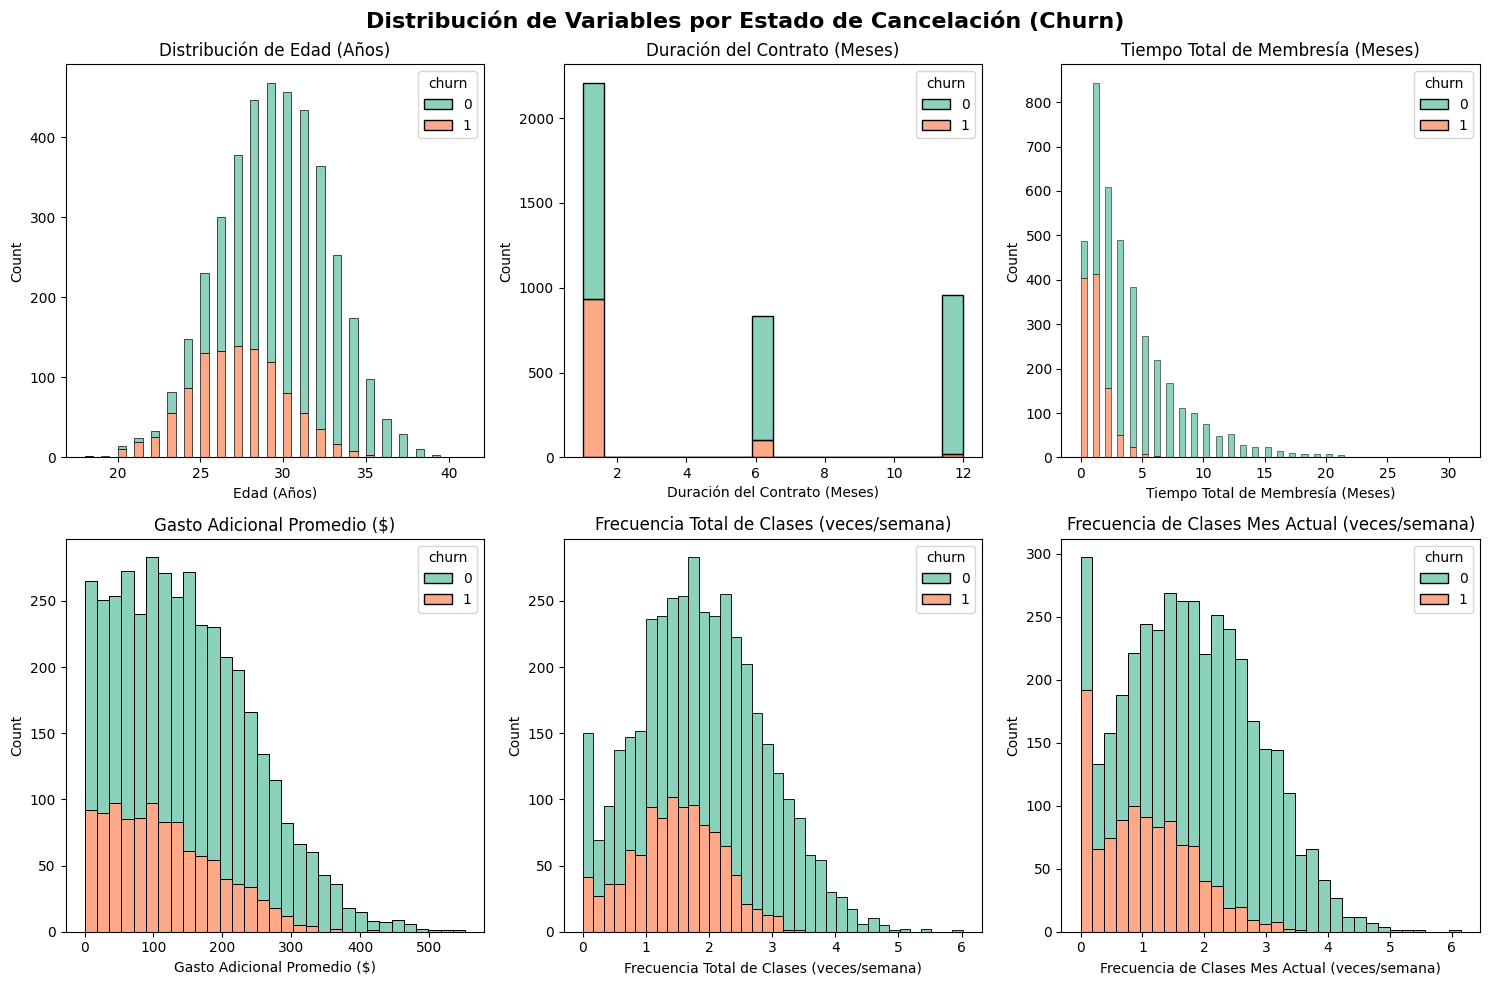

In [13]:
# Distribución de variables clave por estado de cancelación
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribución de Variables por Estado de Cancelación (Churn)', fontsize=16, fontweight='bold')

# Edad
sns.histplot(data=gym, x='age', hue='churn', multiple='stack', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Edad (Años)')
axes[0, 0].set_xlabel('Edad (Años)')

# Duración del contrato
sns.histplot(data=gym, x='contract_period', hue='churn', multiple='stack', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Duración del Contrato (Meses)')
axes[0, 1].set_xlabel('Duración del Contrato (Meses)')

# Lifetime
sns.histplot(data=gym, x='lifetime', hue='churn', multiple='stack', palette='Set2', ax=axes[0, 2])
axes[0, 2].set_title('Tiempo Total de Membresía (Meses)')
axes[0, 2].set_xlabel('Tiempo Total de Membresía (Meses)')

# Gasto adicional promedio
sns.histplot(data=gym, x='avg_additional_charges_total', hue='churn', multiple='stack', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Gasto Adicional Promedio ($)')
axes[1, 0].set_xlabel('Gasto Adicional Promedio ($)')

# Frecuencia total de clases
sns.histplot(data=gym, x='avg_class_frequency_total', hue='churn', multiple='stack', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Frecuencia Total de Clases (veces/semana)')
axes[1, 1].set_xlabel('Frecuencia Total de Clases (veces/semana)')

# Frecuencia de clases mes actual
sns.histplot(data=gym, x='avg_class_frequency_current_month', hue='churn', multiple='stack', palette='Set2', ax=axes[1, 2])
axes[1, 2].set_title('Frecuencia de Clases Mes Actual (veces/semana)')
axes[1, 2].set_xlabel('Frecuencia de Clases Mes Actual (veces/semana)')

plt.tight_layout()
plt.show()


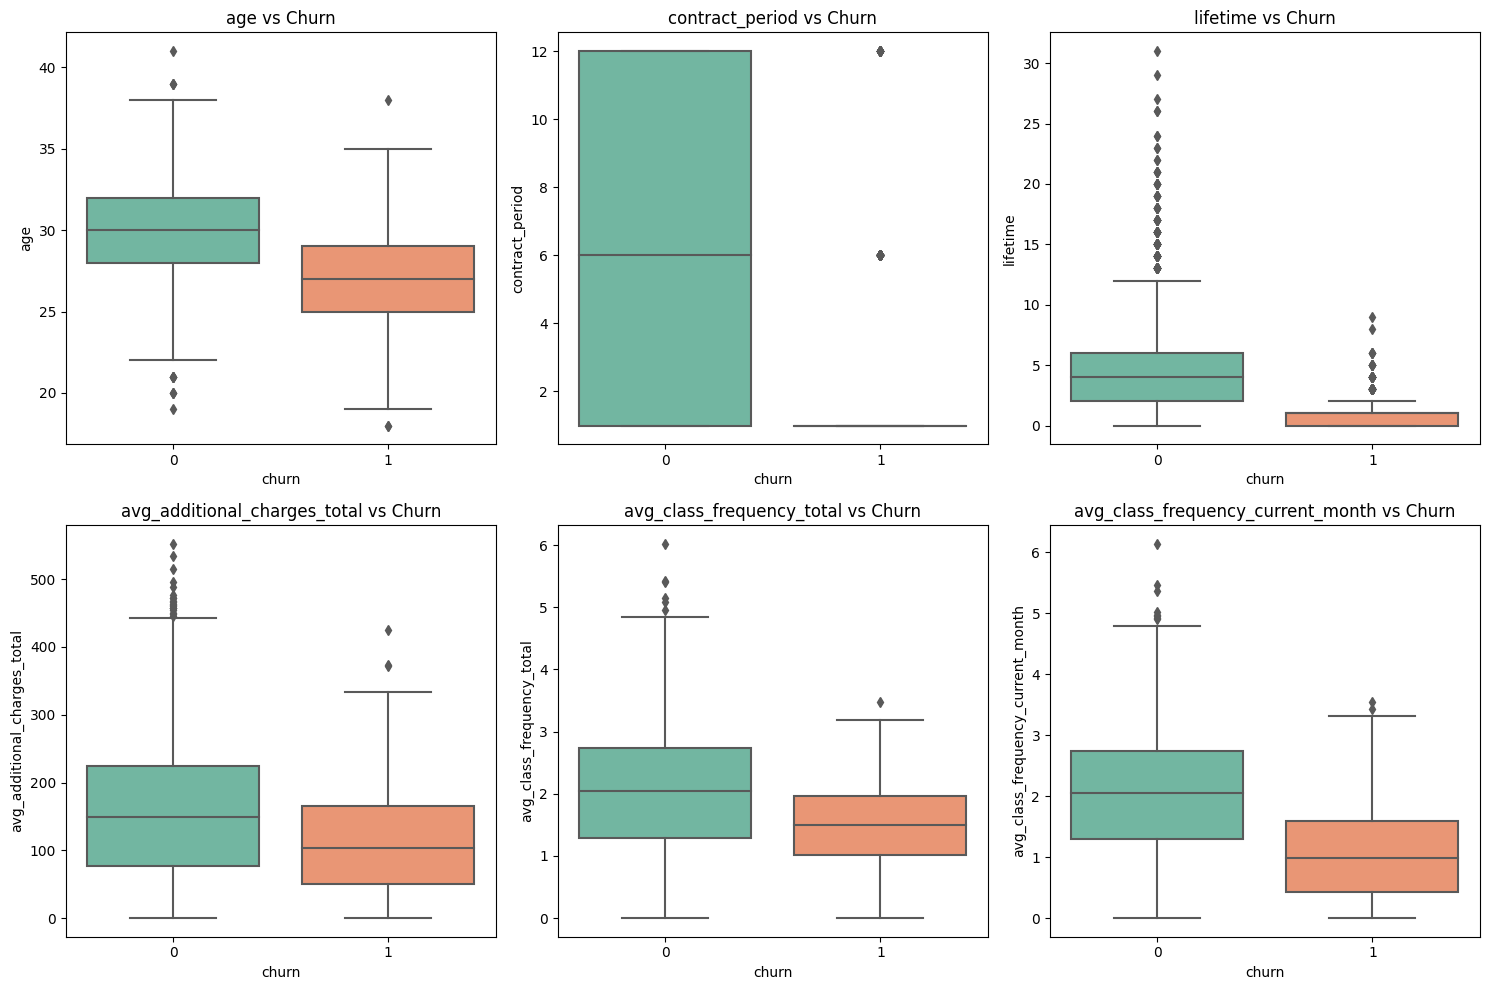

In [14]:
# Boxplots comparativos por estado de churn


variables = ['age', 'contract_period', 'lifetime',
             'avg_additional_charges_total', 
             'avg_class_frequency_total', 
             'avg_class_frequency_current_month']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=gym, x='churn', y=var, palette='Set2')
    plt.title(f'{var} vs Churn')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset
</div>

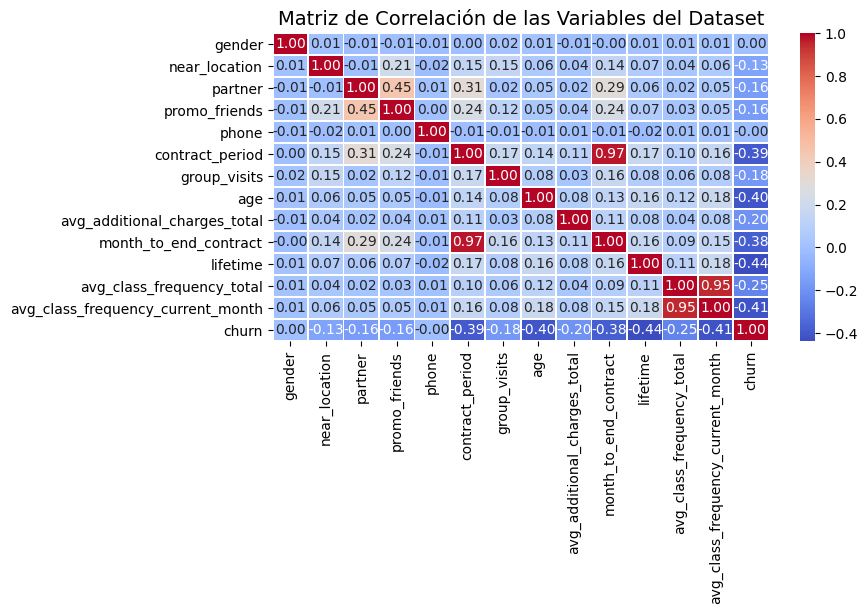

In [15]:
# Calcular la matriz de correlación
corr_matrix = gym.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de las Variables del Dataset', fontsize=14)
plt.show()


<div style="background-color: #EAD6D1; padding: 15px; border-radius: 10px;">
    
#### **CONCLUSIONES DEL PASO 2: ANALISIS EXPLORATORIO DE DATOS (EDA)**

Durante esta etapa se realizó una exploración exhaustiva del dataset con el **objetivo de comprender la estructura de los datos, la calidad de la información y los patrones de comportamiento de los clientes.**

**🔹 Calidad e integridad de los datos**

El conjunto de datos contiene 4,000 registros y 14 columnas.

No se encontraron valores nulos ni duplicados, lo cual garantiza una base limpia y lista para el análisis.

Los nombres de las columnas fueron normalizados a minúsculas para mantener coherencia en el tratamiento de variables.

Las variables se encuentran correctamente tipificadas (int64 y float64).

**🔹 Estadísticas descriptivas generales**

El análisis inicial muestra lo siguiente:

La **edad promedi**o de los clientes es de **29 años**, con un rango entre 18 y 41 años.

La **duración promedio del contrato es de 4.7 meses**, aunque existen planes de hasta 12 meses.

El **90 % de los usuarios proporcionó su número telefónico** y **85 % vive cerca del gimnasio**.

Solo el **31 % fue referido por amigos** (promo_friends = 1).

El **27 % de los clientes ha cancelado su membresía** (churn = 1).

**🔹 Comparación entre clientes activos y cancelados**

El análisis de promedios agrupados por churn reveló diferencias significativas entre ambos grupos:

**Duración del contrato** (contract_period): Los clientes activos presentan un promedio de ¨**5.75 meses**, mientras que los cancelados solo **1.73 meses.** Los contratos más cortos están claramente asociados a mayor tasa de cancelación.

**Tiempo total de membresía**(lifetime): Los usuarios activos permanecen en promedio **4.71 meses**, frente a **0.99 meses** en los que se dieron de baja, mostrando una fuerte relación entre permanencia y retención.

**Frecuencia total de clases** (avg_class_frequency_total): Los clientes activos asisten a más clases ¨**(2.02)** que los cancelados **(1.47)**, evidenciando un mayor compromiso con la actividad física.

**Frecuencia mensual actual** (avg_class_frequency_current_month): La frecuencia en el mes más reciente es de **2.03** para activos y **1.04** para cancelados, lo que sugiere que la asistencia reciente es un importante indicador de retención.

**Gasto adicional promedio** (avg_additional_charges_total): Los usuarios activos invierten más en servicios complementarios **(158.45)** frente a **115.08** en quienes cancelan.

**Proximidad al gimnasio** (near_location): El **87 %** de los clientes activos vive cerca, frente al **77 %** de los cancelados, lo cual también influye positivamente en la retención.

**Edad** (age): Los clientes que cancelan tienden a ser ligeramente más jóvenes **(26.99 años)** que los que permanecen **(29.98 años)**.

En general, las diferencias confirman que la permanencia está asociada con mayor compromiso, antigüedad, proximidad y participación activa.

**🔹 Matriz de correlación**

Las **variables más correlacionadas negativamente** con churn son:

**contract_period** (-0.39)

**month_to_end_contract** (-0.38)

**lifetime** (-0.44)

**avg_class_frequency_total** (-0.25)

**avg_class_frequency_current_month** (-0.41)

Esto indica que **mayor antigüedad, frecuencia de clases y duración del contrato reducen la probabilidad de cancelación**.

Las correlaciones positivas entre contract_period, lifetime y month_to_end_contract reflejan consistencia interna entre duración y retención.

**🔹 Distribución y comportamiento visual de las variables**

Los histogramas y boxplots confirman las diferencias observadas:

Los **clientes activos muestran mayor participación**, con distribuciones desplazadas hacia **valores más altos** en:

**contract_period, lifetime, avg_class_frequency_total, avg_class_frequency_current_month y avg_additional_charges_total**.

Los clientes que cancelan presentan menor actividad reciente, contratos más cortos y menor gasto adicional.

Las variables relacionadas con la ubicación (near_location) y la edad también influyen, pero en menor medida.

**✅ Conclusión general del EDA**

El análisis exploratorio muestra un dataset limpio, consistente y con patrones claros entre retención y participación.
**Las variables que más inciden en la cancelación** son aquellas que reflejan compromiso y permanencia del cliente:

**Duración del contrato**,

**Tiempo total de membresía**,

**Frecuencia de clases**, y

**Gasto adicional en servicios**.

Estos hallazgos serán clave para la fase siguiente del proyecto, donde se construirá un modelo de predicción del churn basado en las variables más influyentes.

</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien mostrada la matriz de correlación! Solo ten en cuenta que no siempre correlación significa causalidad, puede que en algunos casos tengas variables altamente correlacionadas pero no necesariamente son causa una de la otra

<div style="background-color: #E6E6FA; padding: 15px; border-radius: 12px; ">
    
### **PASO 2.1 HIPOTESIS DEL ANALISIS**

</div>

<div style="background-color:#f5f0e6; padding:20px; border-radius:10px;">

Durante el Análisis Exploratorio de Datos (EDA) se identificaron patrones de comportamiento asociados con la retención y cancelación de clientes.  
A partir de estas observaciones, se formulan las siguientes **hipótesis** que guiarán la fase de modelado predictivo:

---

### 🔹 Hipótesis 1. Duración del contrato
> **Los clientes con contratos de mayor duración tienen menor probabilidad de cancelar su membresía.**

📊 *Evidencia:* En el análisis, `contract_period` mostró correlación negativa moderada con `churn` (-0.39), indicando que los contratos más largos favorecen la permanencia.

---

### 🔹 Hipótesis 2. Tiempo total de membresía
> **A mayor tiempo total como miembro (`lifetime`), menor probabilidad de cancelación.**

📊 *Evidencia:* La variable `lifetime` tiene la correlación más alta en valor absoluto con `churn` (-0.44), lo que confirma que la antigüedad es un factor clave de retención.

---

### 🔹 Hipótesis 3. Frecuencia de asistencia
> **Los clientes que asisten con mayor frecuencia al gimnasio son menos propensos a cancelar.**

📊 *Evidencia:* Tanto `avg_class_frequency_total` como `avg_class_frequency_current_month` presentan correlaciones negativas (-0.25 y -0.41, respectivamente), reforzando que la constancia en la actividad reduce la probabilidad de abandono.

---

### 🔹 Hipótesis 4. Gasto adicional promedio
> **Los clientes que consumen servicios adicionales (clases premium, asesorías, etc.) tienden a mantener su membresía.**

📊 *Evidencia:* Los clientes activos tienen un gasto adicional promedio (`avg_additional_charges_total`) de **158.45** frente a **115.08** en los cancelados, evidenciando una relación positiva entre gasto y fidelización.

---

### 🔹 Hipótesis 5. Factores demográficos y de cercanía
> **Vivir cerca del gimnasio o tener beneficios por convenios (partner) influye levemente en la retención.**

📊 *Evidencia:* Aunque las correlaciones son débiles, los clientes activos presentan mayor proporción de cercanía (`near_location = 0.87`) y convenios (`partner = 0.53`) que los cancelados (0.77 y 0.36 respectivamente).

---

### 🧭 Propósito de las hipótesis

Estas hipótesis servirán como **base conceptual** para la construcción del modelo de predicción de cancelación en el siguiente paso.  
El objetivo será **verificar estadísticamente** cuáles de estas variables tienen una influencia significativa en el `churn` y cuáles son menos determinantes en la retención.

</div>


<div style="background-color: #E6E6FA; padding: 15px; border-radius: 12px; ">
    
## **PASO 3. CONSTRUCCION  DEL MODELO PARA PREDECIR LA CANCELACION DE USUARIOS**

</div>




<div style="background-color: #F4ECD8; padding: 15px; border-radius: 13px;">
    
**📌 OBJETIVO DEL PASO 3:**    
Desarrollar modelos de clasificación supervisada capaces de predecir la probabilidad de cancelación de un cliente en el siguiente mes. Se evaluarán los modelos mediante métricas de desempeño como **accuracy, precision y recall** para identificar el algoritmo con mejor rendimiento predictivo.

</div>




<div style="background-color: #f8e1ea; padding: 13px; border-radius: 14px; ">

**PREPARACION DE LOS DATOS**

</div>

In [16]:
# Dividir los datos en características (X) y variable objetivo (y)
X = gym.drop('churn', axis=1)
y= gym['churn']

In [17]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [18]:
# Estandarización de los datos de características númericas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<div style="background-color: #f8e1ea; padding: 13px; border-radius: 12px; ">

**🧮 MODELO 1: REGRESION LOGISTICA**

La regresión logística se emplea como punto de partida por su capacidad para interpretar la influencia de cada variable sobre la probabilidad de cancelación (churn).

</div>

In [19]:
# Entrenar el modelo
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred = log_reg.predict(X_test_scaled)

# Evaluación del modelo
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f'🔹 Accuracy: {acc:.3f}')
print(f'🔹 Precision: {prec:.3f}')
print(f'🔹 Recall: {rec:.3f}')

🔹 Accuracy: 0.922
🔹 Precision: 0.854
🔹 Recall: 0.828


<div style="background-color: #f8e1ea; padding: 13px; border-radius: 12px; ">

**🧮 PREDICCION DE PROBABILIDAD DE CANCELACION PARA CADA CLIENTE**

</div>

In [20]:
# Obtener probabilidades de que cada cliente cancele (clase 1)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Crear un DataFrame con las probabilidades
predicciones = pd.DataFrame({
    'Probabilidad_de_Cancelacion': y_proba,
    'Cancelacion_Predicha': y_pred
})

# Mostrar las primeras filas
predicciones.head(10)

,Probabilidad_de_Cancelacion,Cancelacion_Predicha
0,0.00,0
1,0.98,1
2,0.46,0
3,0.94,1
4,0.04,0
5,0.00,0
6,0.01,0
7,0.00,0
8,0.25,0
9,0.00,0


<div style="background-color: #f8e1ea; padding: 13px; border-radius: 14px; ">

**🧮 MODELO 2: BOSQUE ALEATORIO**

El Bosque Aleatorio se usa por su capacidad para manejar relaciones no lineales y capturar interacciones entre variables de forma más compleja.

</div>


In [21]:
# Entrenar el modelo
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluación del modelo
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)

print("🔹 Resultados Bosque Aleatorio:")
print(f"Accuracy: {acc_rf:.3f}")
print(f"Precision: {prec_rf:.3f}")
print(f"Recall: {rec_rf:.3f}")

🔹 Resultados Bosque Aleatorio:
Accuracy: 0.915
Precision: 0.839
Recall: 0.813


In [22]:
# Comparación de métricas de ambos modelos: Regresión Logística vs Bosque Aleatorio

print("\n📊 Comparación de  los dos Modelos: Regresión Logística y Bosque Aleatorio")
print("Modelo\t\tAccuracy\tPrecision\tRecall")
print(f"Regresión Logística\t{acc:.3f}\t\t{prec:.3f}\t\t{rec:.3f}")
print(f"Bosque Aleatorio\t{acc_rf:.3f}\t\t{prec_rf:.3f}\t\t{rec_rf:.3f}")



📊 Comparación de  los dos Modelos: Regresión Logística y Bosque Aleatorio
Modelo		Accuracy	Precision	Recall
Regresión Logística	0.922		0.854		0.828
Bosque Aleatorio	0.915		0.839		0.813


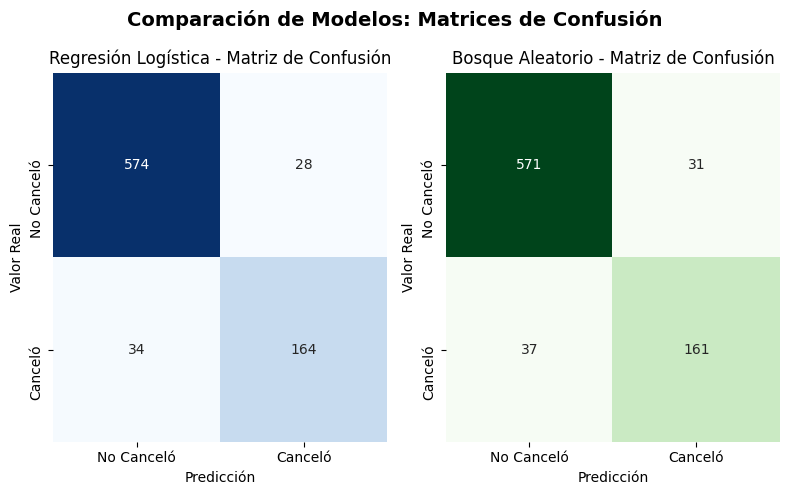

In [23]:
# Comparación visual de las dos matrices de confusión por cada modelo

# Calcular matrices de confusión
cm_log = confusion_matrix(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Matriz para Regresión Logística
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Regresión Logística - Matriz de Confusión')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Valor Real')
axes[0].set_xticklabels(['No Canceló', 'Canceló'])
axes[0].set_yticklabels(['No Canceló', 'Canceló'])

# Matriz para Bosque Aleatorio
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1])
axes[1].set_title('Bosque Aleatorio - Matriz de Confusión')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Valor Real')
axes[1].set_xticklabels(['No Canceló', 'Canceló'])
axes[1].set_yticklabels(['No Canceló', 'Canceló'])

# Título general y mostrar
plt.suptitle('Comparación de Modelos: Matrices de Confusión', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [24]:
# Obtener los coeficientes del mejor modelo predictivo: Regresión Lineal

# Crear un DataFrame con el nombre de las columnas y sus coeficientes
importancia = pd.DataFrame({
    'Característica': X_train.columns,
    'Coeficiente': log_reg.coef_[0]
})

# Calcular el valor absoluto para ordenar por magnitud de influencia
importancia['Importancia_Absoluta'] = np.abs(importancia['Coeficiente'])

# Ordenar de mayor a menor influencia
importancia = importancia.sort_values(by='Importancia_Absoluta', ascending=False).reset_index(drop=True)

# Mostrar las 10 características más relevantes
print(importancia.head(10))

                      Característica  Coeficiente  Importancia_Absoluta
0  avg_class_frequency_current_month        -4.45                  4.45
1                           lifetime        -3.85                  3.85
2          avg_class_frequency_total         3.30                  3.30
3                                age        -1.09                  1.09
4                    contract_period        -0.72                  0.72
5       avg_additional_charges_total        -0.55                  0.55
6              month_to_end_contract        -0.53                  0.53
7                       group_visits        -0.39                  0.39
8                      promo_friends        -0.28                  0.28
9                            partner        -0.08                  0.08


<div style="background-color: #EAD6D1; padding: 15px; border-radius: 10px;">
    
#### **CONCLUSIONES DEL PASO 3: CONSTRUCCION DEL MODELO PARA PREDECIR LA CANCELACION DE USUARIOS**

Durante esta fase se entrenaron dos modelos de clasificación supervisada para predecir la probabilidad de cancelación de un cliente del gimnasio en el mes siguiente. Los **modelos evaluados fueron Regresión Logística y Bosque Aleatorio**, ambos aplicados sobre los mismos conjuntos de entrenamiento y prueba (80/20) y bajo el mismo random_state=0 para garantizar reproducibilidad.

**📊 Desempeño de los Modelos**

- **Regresión Logística**
  - Accuracy: **0.922**
  - Precision: **0.854**
  - Recall: **0.828**

- **Bosque Aleatorio**
  - Accuracy: **0.915**
  - Precision: **0.839**
  - Recall: **0.813**

**🧩 Análisis Comparativo**

**Ambos modelos muestran un rendimiento muy alto**, con valores de accuracy superiores al 91%.

**La regresión logística obtuvo un ligero mejor desempeño global**, con mayor accuracy y recall, lo que indica una mejor capacidad para identificar correctamente a los clientes que cancelan.

El bosque aleatorio, aunque también es sólido, presentó métricas ligeramente inferiores, lo cual sugiere que su complejidad no aporta una mejora significativa frente a la simplicidad del modelo logístico.

Las matrices de confusión confirman esta tendencia: ambos modelos identifican correctamente la mayoría de los casos, pero la regresión logística presenta menos falsos negativos, es decir, predice mejor a los clientes propensos a abandonar el gimnasio.

**⚙️ Importancia de las Características**

El **análisis de los coeficientes del modelo de Regresión Logística** permitió identificar las variables con **mayor influencia en la probabilidad de cancelación**.

1. **Avg_class_frequency_current_month → Coeficiente: -4.45**
   
🔹 Los clientes con menor frecuencia de visitas en el mes actual tienen mayor probabilidad de cancelar.

2. **Lifetime → Coeficiente: -3.85**
   
🔹 A menor tiempo total como miembro, mayor riesgo de abandono.

3. **Avg_class_frequency_total → Coeficiente: +3.30**
   
🔹 Una mayor frecuencia total de visitas reduce la probabilidad de churn.

4. **Age → Coeficiente: -1.09**
   
🔹 Los clientes más jóvenes tienden a cancelar con más frecuencia.

5. **Contract_period → Coeficiente: -0.72**
   
🔹 Los contratos más largos se asocian con mayor permanencia.

6. **Avg_additional_charges_total → Coeficiente: -0.55**
   
🔹 Quienes consumen servicios adicionales muestran mayor compromiso con el gimnasio.

En general, las **frecuencias de asistencia y la antigüedad del cliente** son los factores más determinantes para predecir la cancelación.
Esto concuerda con patrones comunes en gimnasios, donde la **participación activa y el hábito de visita frecuente** son claves para la retención.

**💡 Conclusión General**

El modelo de **Regresión Logística** se considera el más adecuado para este caso, ya que:

Ofrece un equilibrio ideal entre **precisión y recuperación**.

Es **más interpretable**, permitiendo analizar el impacto de cada variable sobre la cancelación.

Presenta un desempeño comparable o superior al modelo más complejo (Random Forest), con un costo computacional menor.

Este modelo puede ser utilizado para **predecir clientes con riesgo de abandono** y permitir al gimnasio implementar estrategias preventivas de retención, como incentivos, comunicación personalizada o mejoras en los servicios.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
</div>

<div style="background-color: #E6E6FA; padding: 15px; border-radius: 12px; ">
    
## **PASO 4. CREAR CLUSTERES DE USUARIOS(AS)**

</div>

<div style="background-color: #F4ECD8; padding: 15px; border-radius: 13px;">
    
**📌 OBJETIVO DEL PASO 4:**    
El objetivo es **segmentar a los clientes del gimnasio** en grupos con características similares (clústeres) para comprender patrones de comportamiento y posibles diferencias en la tasa de cancelación.
Para ello, se utilizará un enfoque de clustering no supervisado mediante el algoritmo **K-Means**.

</div>


<div style="background-color: #f8e1ea; padding: 13px; border-radius: 14px; ">

**PREPARACION DE LOS DATOS**

</div>



In [25]:
# Excluir la variable objetivo
gym_features = gym.drop('churn', axis=1)

In [26]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gym_features)


<div style="background-color: #f8e1ea; padding: 13px; border-radius: 14px; ">

**ANALISIS JERARQUICO: DENDOGRAMA**

Se utiliza la función linkage() para generar un dendrograma que muestre las posibles agrupaciones y ayude a estimar el número óptimo de clústeres.

</div>


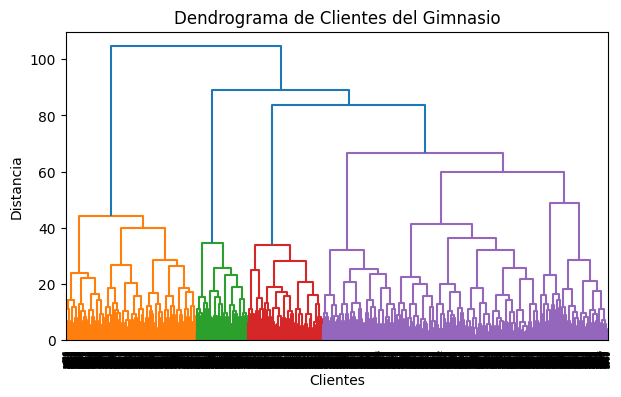

In [27]:
# Crear la matriz de distancias y el dendrograma
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(7, 4))
dendrogram(linked)
plt.title('Dendrograma de Clientes del Gimnasio')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente aplicación de los diferentes algoritmos para poder identificar diferentes grupos de usuarios dependiendo de sus características, una técnica muy útil en proyectos de segmentación
</div>

<div style="background-color: #f8e1ea; padding: 13px; border-radius: 14px; ">

**ENTRENAMIENTO DEL MODELO K-MEANS**

</div>

In [28]:
# Definir y entrenar el modelo K-Means
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_scaled)

# Añadir etiquetas de clúster al DataFrame original
gym['cluster'] = labels

# Visualizar las primeras filas con el nuevo campo
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0,1
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0,3
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0,3



<div style="background-color: #f8e1ea; padding: 13px; border-radius: 14px; ">

**ANALISIS DE LOS CLUSTERES**

Calcular los valores promedio de las variables para cada clúster y observar patrones o diferencias relevantes.

</div>


In [29]:
# Promedios de las características por clúster
cluster_means = gym.groupby('cluster').mean()
cluster_means

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.50,0.96,0.78,0.57,1.00,10.89,0.54,29.98,160.76,9.95,4.74,1.98,1.97,0.03
1,0.52,0.86,0.47,0.31,0.00,4.79,0.43,29.30,143.96,4.48,3.92,1.85,1.72,0.27
2,0.50,0.00,0.46,0.08,1.00,2.35,0.22,28.48,135.46,2.20,2.81,1.66,1.48,0.44
3,0.49,1.00,0.35,0.24,1.00,1.95,0.34,28.17,131.62,1.86,2.44,1.25,1.01,0.51
4,0.56,0.98,0.36,0.23,1.00,2.67,0.47,30.13,161.66,2.46,4.90,2.85,2.85,0.07


<div style="background-color: #EAD6D1; padding: 13px; border-radius: 14px; ">

**INTERPRETACION Y RETRATO DE LOS CLUSTERES**

**Clúster 0 — “Clientes comprometidos y estables”**

Alta antigüedad (≈ 5 meses).

Alta frecuencia de clases.

Contratos largos y cercanía al gimnasio.

Tasa de cancelación **muy baja (3 %).**

🟢 Representan a los **usuarios más fieles** y deberían ser el modelo de referencia para retención.

**Clúster 1 — “Clientes moderadamente activos”**

Cercanos al gimnasio, pero con menor frecuencia y contratos medianos.

Tasa de cancelación **moderada (27 %).**

🟠 Podrían mantenerse leales con incentivos o beneficios de fidelidad (descuentos, clases especiales).

**Clúster 2 — “Clientes nuevos o distantes”**

No viven cerca, baja frecuencia y poca antigüedad.

Contratos muy cortos (≈ 2 meses).

Tasa de cancelación **alta (44 %).**

🔴 Este grupo refleja **riesgo elevado de abandono**. Es clave diseñar campañas promocionales, comunicación y motivación.

**Clúster 3 — “Jóvenes locales con baja constancia”**

Promedio de edad más bajo, viven cerca, pero poca asistencia y permanencia corta.

Tasa de cancelación **muy alta (51 %).**

🔴 Posiblemente buscan resultados rápidos o se desmotivan pronto. Se recomienda ofrecer programas cortos y dinámicos, seguimiento personalizado o entrenadores jóvenes.

**Clúster 4 — “Clientes activos y satisfechos”**

Mayor frecuencia total de clases.

Contratos cortos, pero alta participación.

Tasa de cancelación **baja (7 %).**

🟢 Son **usuarios muy comprometidos**, posiblemente atraídos por experiencias positivas o promociones. Representan un segmento de alto valor.

</div>

<div style="background-color: #f8e1ea; padding: 13px; border-radius: 14px; ">

**EVALUACION DEL MODELO K-MEANS CON LA METRICA SILHOUETTE**

</div>

In [30]:
# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled, labels)

print(f"Puntaje promedio de silueta para K-Means (k=5): {silhouette_avg:.2f}")

Puntaje promedio de silueta para K-Means (k=5): 0.14


<div style="background-color: #f8e1ea; padding: 13px; border-radius: 14px; ">

**DISTRIBUCIONES Y COMPARACIONES VISUALES**

</div>

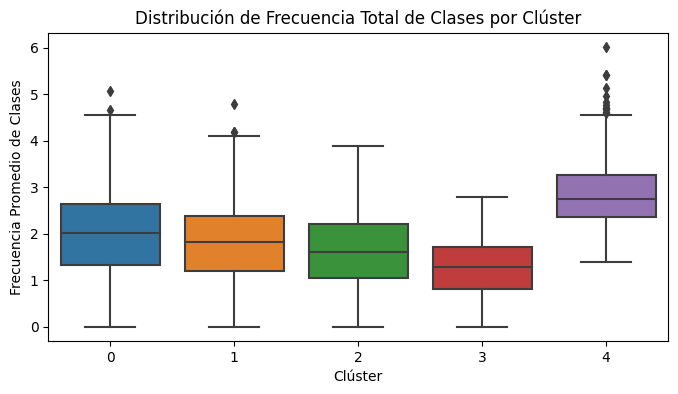

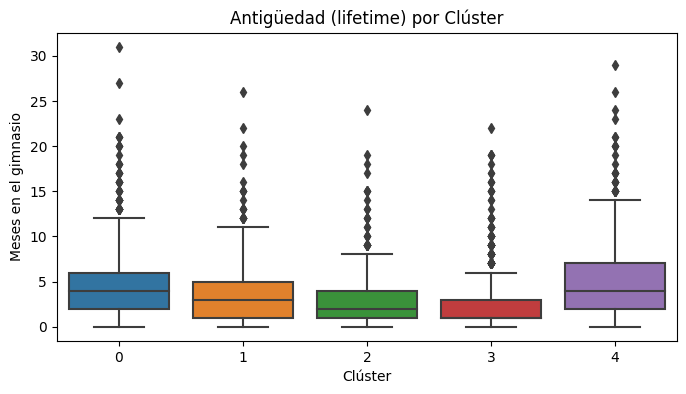

In [31]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=gym, x='cluster', y='avg_class_frequency_total')
plt.title('Distribución de Frecuencia Total de Clases por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Frecuencia Promedio de Clases')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data=gym, x='cluster', y='lifetime')
plt.title('Antigüedad (lifetime) por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Meses en el gimnasio')
plt.show()

<div style="background-color: #f8e1ea; padding: 13px; border-radius: 14px; ">

**TASA DE CANCELACION POR CLUSTER**

</div>

In [50]:
# Calcular tasa de cancelación por clúster
cancelacion_cluster = gym.groupby('cluster')['churn'].mean()
print("Tasa de cancelación promedio por clúster:")
print(cancelacion_cluster)

Tasa de cancelación promedio por clúster:
cluster
0   0.03
1   0.27
2   0.44
3   0.51
4   0.07
Name: churn, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
</div>

<div style="background-color: #EAD6D1; padding: 15px; border-radius: 10px;">
    
#### **CONCLUSIONES DEL PASO 4: CREAR CLUSTERES DE USUARIOS(AS)**

Durante esta fase, se aplicó un análisis no supervisado mediante **K-Means (n = 5)** sobre los datos estandarizados del gimnasio.
El objetivo fue identificar grupos de clientes con comportamientos similares en cuanto a **uso, permanencia y probabilidad de cancelación**.

**🔍 Hallazgos principales**

El **dendrograma jerárquico** reveló una estructura de 4–6 grupos; se seleccionaron 5 para análisis comparativo.

Los clústeres presentan **diferencias claras** en frecuencia de uso, antigüedad y localización.

Los grupos **0 y 4** destacan por su **baja tasa de cancelación**, mientras que **2 y 3** concentran la mayoría de abandonos.

Los **factores más determinantes** para la retención son la **frecuencia de asistencia** y la **antigüedad (lifetime)**, en línea con lo observado en el modelo predictivo de regresión logística del paso 3.

**📈 Evaluación del modelo K-Means**

Se utilizó el **coeficiente de silueta** para evaluar la cohesión interna y separación entre clústeres.
El resultado obtenido fue:

**Puntaje promedio de silueta: 0.14**

Esto indica que la **estructura de los clústeres es débil** y que existe un grado considerable de **solapamiento entre grupos.**
En otras palabras, aunque los clientes se segmentaron en cinco categorías distintas, **las fronteras entre ellos no son muy claras**, lo cual es esperable en un contexto de comportamiento humano, donde las diferencias entre usuarios no suelen ser estrictas.

💡 Como mejora futura, se podría probar con un número diferente de clústeres (por ejemplo, k = 4 o k = 6) o explorar otros métodos como clustering jerárquico completo para validar la consistencia de la segmentación.

**🧭 Implicaciones estratégicas**

**Clúster 2 y 3:** priorizar estrategias de retención (seguimiento personalizado, promociones de compromiso).

**Clúster 0 y 4:** reforzar programas de fidelización y recompensas.

**Clúster 1:** monitorear comportamiento, ofreciendo experiencias que incrementen su frecuencia de uso.

**✅ Conclusión general**

El modelo de clustering permitió **identificar patrones conductuales relevantes** entre los clientes del gimnasio, aunque con una separación moderada entre grupos.
Combinado con el modelo predictivo del paso 3, constituye una **herramienta estratégica integral** para:

**Detectar segmentos de riesgo de abandono.**

**Optimizar estrategias de retención personalizadas.**

**Fortalecer la fidelización de los usuarios más comprometidos.**

En síntesis, aunque el desempeño del modelo K-Means (silhouette = 0.14) refleja una **estructura de segmentación tenue**, los hallazgos obtenidos son **valiosos para la toma de decisiones comerciales y operativas** en el gimnasio.
</div>

<div style="background-color: #E6E6FA; padding: 15px; border-radius: 12px; ">
    
## **PASO 5. CONCLUSIONES Y RECOMENDACIONES**

</div>

<div style="background-color: #ede7f6; padding: 13px; border-radius: 12px; ">
    
El análisis combinó **modelos predictivos supervisados** (Regresión Logística y Bosque Aleatorio) y **modelos no supervisados** (K-Means) para comprender el comportamiento de cancelación de los clientes de **Model Fitness.**
Esto permitió tanto **predecir la probabilidad de abandono individual**, como **segmentar a los clientes en grupos homogéneos** según sus patrones de uso, permanencia y compromiso.

**📊 Principales Conclusiones Analíticas**

**1. Predicción de la cancelación:**

El modelo de **Regresión Logística** alcanzó una **precisión del 92 %**, con un **recall del 82.8 %**, convirtiéndose en la mejor herramienta para anticipar qué clientes tienen mayor riesgo de cancelar su membresía.

Las variables más influyentes en la cancelación fueron:

**Frecuencia de asistencia actual y total:** los clientes menos activos tienden a cancelar.

**Antigüedad (lifetime):** miembros recientes presentan mayor riesgo.

**Duración del contrato:** contratos cortos se asocian a más abandonos.

**2. Segmentación de clientes (K-Means):**

Se identificaron **5 clústeres** con comportamientos distintos en uso y fidelidad.

Los **clústeres 2 y 3** presentan las **tasas de cancelación más altas** (44 % y 51 %), asociados a baja frecuencia y antigüedad.

Los **clústeres 0 y 4** agrupan a clientes **fieles, activos y con larga permanencia.**

**El coeficiente de silueta (0.14)** indica **baja separación entre grupos**, lo que sugiere comportamientos intermedios y graduales, comunes en contextos de hábitos personales.

**3. Validación de hipótesis iniciales:**

✅ Los clientes que asisten con mayor frecuencia tienen menor probabilidad de cancelar.

**Confirmada.** La frecuencia de uso es el predictor más fuerte de permanencia.

✅ Los clientes con contratos más largos son más leales.

**Confirmada.** La variable contract_period mostró correlación negativa con el abandono.

⚠️ Los descuentos o membresías en grupo reducen el abandono.

**Parcialmente confirmada.** Los efectos de promo_friends y group_visits son leves, sugiriendo que no bastan por sí solos sin un hábito constante de        asistencia.


**💡 Recomendaciones Estratégicas para la Retención de Clientes**

**1. 🔔 Implementar alertas de riesgo personalizadas**

Utilizar el modelo predictivo para identificar semanalmente a los clientes con alta probabilidad de abandono.

Ejemplo: automatizar notificaciones a gerentes o entrenadores para contactar a usuarios con caída reciente en su frecuencia.

**Acción: ofrecer sesiones gratuitas, asesoría o seguimiento personalizado.**

**2. 🎁 Fortalecer programas de fidelización y recompensas**

Reforzar los incentivos para los clientes de los **clústeres 0 y 4**, que ya muestran compromiso alto.

Ejemplo: descuentos progresivos por antigüedad, niveles de membresía “Premium”, beneficios por referidos activos.

**3. 📆 Diseñar planes de permanencia flexible pero comprometida**

Dado que los contratos cortos tienden a mayor rotación, ofrecer **planes de mediano plazo (6–12 meses)** con incentivos por continuidad.

Ejemplo: incluir recompensas por renovación automática o cuotas preferenciales.

**4. 💬 Fomentar la interacción y comunidad**

Incrementar la retención de los clústeres 2 y 3 mediante dinámicas sociales: clases grupales, desafíos mensuales o eventos de bienestar.

Ejemplo: gamificar la asistencia con logros digitales o rankings internos.

**5. 📈 Monitorear métricas clave de retención**

**Tasa mensual de cancelación.**

**Frecuencia promedio de uso por cliente.**

**Evolución de clientes en riesgo.**

Estas métricas deben integrarse en un tablero de control interno para una gestión proactiva de la membresía.

**🧭 Conclusión Final**

El proyecto demostró que la **predicción de abandono y la segmentación de clientes son herramientas complementarias** para la gestión de gimnasios.
La combinación de ambos enfoques permite **anticipar la pérdida de clientes y diseñar estrategias de retención más efectivas**, centradas en la **frecuencia de asistencia, la antigüedad y la relación con la marca.**

Implementar las acciones propuestas permitirá a **Model Fitness:**

**1. Reducir la rotación de clientes,**

**2. Aumentar la satisfacción y compromiso**, y

**3. Optimizar la rentabilidad a largo plazo mediante una gestión más personalizada y basada en datos.**
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Planteaste muy buenas conclusiones en base a los datos de tu análisis, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
    
Saludos!
</div>